In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 
import tabulate

In [3]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [4]:
#partition Data
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [5]:
maxDegree = 20
numModels = 10

bias2Arr = np.zeros(maxDegree)
varianceArr = np.zeros(maxDegree)
mseArr = np.zeros(maxDegree)

y_res_arr = np.zeros(maxDegree)

for deg in range(maxDegree): 
    predMatrix = np.zeros((numModels,len(testData[:, 0])))
    for i in range(numModels): #should be 0, 10
        poly = PolynomialFeatures(degree = deg+1)
        # reshaping data
        X_train = poly.fit_transform(trainData[i][:, 0].reshape(-1, 1))
        y_train = trainData[i][:, 1].reshape(-1, 1)
        X_test = poly.fit_transform(testData[:, 0].reshape(-1, 1))
        y_test = testData[:, 1].reshape(-1, 1)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        
        y_pred = reg.predict(X_test)
        predMatrix[i] = y_pred.reshape( len(y_pred))
        mseArr[deg] += np.mean(np.square(y_pred - y_test))

    mseArr[deg] /= numModels
    bias2Arr[deg] = np.mean( (np.mean(predMatrix, axis = 0) - testData[:, 1] ) ** 2 ) 
    varianceArr[deg] = np.mean(np.var(predMatrix, axis = 0))

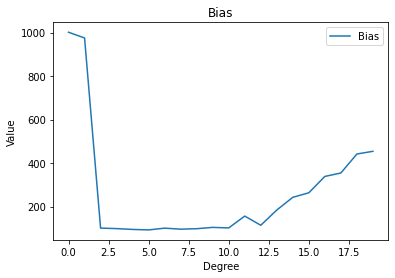

In [6]:
# plt.plot(varianceArr)
plt.plot(np.sqrt(bias2Arr), label = "Bias")
# plt.plot(interceptArr)
# plt.plot(mseArr)
plt.title('Bias')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

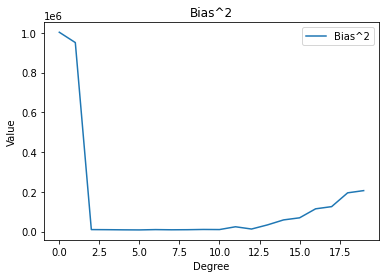

In [7]:
# plt.plot(varianceArr)
plt.plot(bias2Arr, label = "Bias^2")
# plt.plot(interceptArr)
# plt.plot(mseArr)
plt.title('Bias^2')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

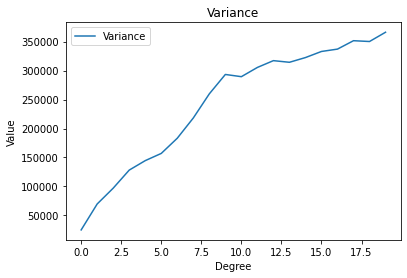

In [8]:
plt.plot(varianceArr, label = "Variance")
plt.title('Variance')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()

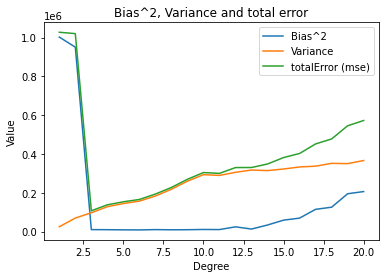

In [14]:
plt.plot( range(1, 21),bias2Arr, label = "Bias^2")
plt.plot(range(1, 21), varianceArr, label = "Variance")
plt.title('Bias^2, Variance and total error')
plt.plot(range(1, 21),mseArr, label='totalError (mse)')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.show()


In [10]:
# irreducible error

irredErrArr = mseArr - bias2Arr - varianceArr

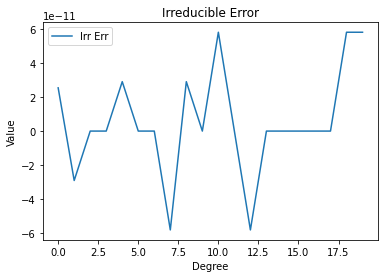

In [11]:

plt.plot(irredErrArr, label = 'Irr Err')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.title('Irreducible Error')
# plt.plot(mseArr)
# plt.plot(varianceArr)
# plt.plot(bias2Arr)
plt.legend()
plt.show()

In [12]:
tableDF = pd.DataFrame({
    'degree': range(1, 21),
    'bias': np.sqrt(bias2Arr),
    'variance': varianceArr,
})

In [13]:
print(tableDF)

    degree         bias       variance
0        1  1001.199438   24900.980788
1        2   974.916151   69705.368568
2        3   101.225490   97018.665398
3        4    98.967191  128204.363575
4        5    95.134035  144548.413605
5        6    92.906744  157000.474469
6        7   101.015382  183253.509661
7        8    96.350301  218194.359732
8        9    98.457701  259873.545684
9       10   104.509529  293339.658715
10      11   102.070677  289514.448769
11      12   156.450648  305461.347615
12      13   114.329040  317199.294161
13      14   184.289893  314368.492932
14      15   242.782254  322506.511598
15      16   263.542682  333043.329454
16      17   338.643908  337126.175089
17      18   354.500070  351638.877299
18      19   441.651481  350246.604188
19      20   454.116573  366244.628031
